In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [2]:
# load the data
def load_data(csvname):
    data = np.asarray(pd.read_csv(csvname,header = None))
    x = data[:,0]
    x.shape = (np.size(x),1)
    temp = np.ones((np.size(x),1))
    X = np.concatenate((temp,x),1)
    y = data[:,1]
    y = y/y.max()
    y.shape = (np.size(y),1)
    return X,y

In [3]:
#TEST İÇİN EKLENDİ
def sigmoid(s):
    return 1.0 / (1 + np.exp(-s))

def logistic_loss_function(x_tilda,y,w_tilda):
    l_w_b = 0
    n = x_tilda.shape[0]
    for i in range(n):
        s_i = x_tilda[i].T.dot(w_tilda) 
        sigm = sigmoid(s_i)
        l_w_b += (sigm - y[i])**2
    return l_w_b
    
def cal_gradient(X,y,w):
    gradient = 0 
    n = X.shape[0]
    for i in range(n):
        s_i = X[i].T.dot(w) 
        left_i = sigmoid(s_i) - y[i]
        mid_i = sigmoid(s_i)
        right_i = 1 -  sigmoid(s_i)
        gradient += left_i * mid_i * right_i * X[i]
    return 2 * gradient

In [4]:
### TODO: YOUR CODE GOES HERE - COMPLETE THE GRADIENT DESCENT CODE ###
# run gradient descent
def gradient_descent(X,y,w0):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost(w0)
    cost_path.append(cost)
    w = w0

    # start gradient descent loop
    """b = np.zeros(1)
    o = np.ones((9,1))
    x_tilda = np.append(o, X, axis=1)     #x_tilda = [1 X], x_tilda_i = [1 x1 x2] """


    max_its = 5000
    alpha = 10**(-2)
    for k in range(max_its):
        #w_tilda = np.vstack([b, w])   #w_tilda = [b w]
        
        # compute gradient
        #grad = cal_gradient(X,y,w)
        #np_grad = np.array(grad)
        #np_grad.shape = (2,1)
        m = X.shape[0]
        h = sigmoid(np.matmul(X, w))
        np_grad = np.matmul(X.T, (h - y)) / m;
        
        # take gradient step
        w = w - alpha*(np_grad)
        #print(w)
        # update path containers
        w_path.append(w)
        cost = compute_cost(w)
        cost_path.append(cost)
        
    # reshape containers for use in plotting in 3d
    #print(w_path)
    #print("******************************************************************")
    w_path = np.asarray(w_path)
    #print(w_path)
    #print("******************************************************************")
    w_path.shape = (np.shape(w_path)[0],np.shape(w_path)[1])
    #print(w_path)
    #print("******************************************************************")
    return w_path,cost_path

# calculate the cost value for a given input weight w
def compute_cost(w):
    temp = 1/(1 + my_exp(-np.dot(X,w))) - y
    temp = np.dot(temp.T,temp)
    return temp[0][0]

# avoid overflow when using exp - just cutoff after arguments get too large/small
def my_exp(u):
    s = np.argwhere(u > 100)
    t = np.argwhere(u < -100)
    u[s] = 0
    u[t] = 0
    u = np.exp(u)
    u[t] = 1
    return u

In [5]:
# used by plot_logistic_surface to make objective surface of logistic regression cost function
def add_layer(a,b,c):
    a.shape = (2,1)
    b.shape = (1,1)
    z = my_exp(-np.dot(c,a))
    z = 1/(1 + z) - b
    z = z**2
    return z

# plot fit to data and corresponding gradient descent path onto the logistic regression objective surface
def show_fit(w_path,ax,col):
    # plot solution of gradient descent fit to original data
    s = np.linspace(0,25,100)
    t = 1/(1 + my_exp(-(w_path[-1][0] + w_path[-1][1]*s)))
    ax.plot(s,t,color = col)

# plot gradient descent paths on cost surface
def show_paths(w_path,cost_path,ax,col):           
    # plot grad descent path onto surface
    ax.plot(w_path[:,0],w_path[:,1],cost_path,color = col,linewidth = 5)   # add a little to output path so its visible on top of the surface plot
    
# plot logistic regression surface
def plot_surface(ax):
    # plot logistic regression surface
    r = np.linspace(-3,3,100)
    s,t = np.meshgrid(r, r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    # build 3d surface
    surf = np.zeros((np.size(s),1))
    max_its = np.size(y)
    for i in range(0,max_its):
        surf = surf + add_layer(X[i,:],y[i],h)

    # reshape 
    s = np.reshape(s,(100,100))
    t = np.reshape(t,(100,100))
    surf = np.reshape(surf,(100,100))

    # plot 3d surface
    ax.plot_surface(s,t,surf,cmap = 'jet')
    ax.azim = 175
    ax.elev = 20
    
# plot points
def plot_points(X,y,ax):
    ax.plot(X[:,1],y,'ko')

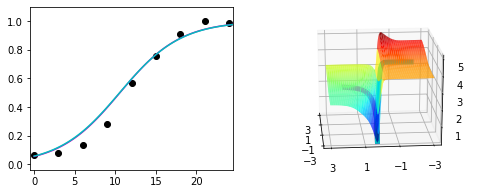

In [6]:
# load dataset
X,y = load_data('bacteria_data.csv') # load in data

# initialize figure, plot data, and dress up panels with axes labels etc.,
fig = plt.figure(facecolor = 'white',figsize = (8,3))
ax1 = fig.add_subplot(121)
ax1.set_xlim(min(X[:,1])-0.5, max(X[:,1])+0.5)
ax1.set_ylim(min(y)-0.1,max(y)+0.1)
#ax1.axis('off')

ax2 = fig.add_subplot(122, projection='3d')
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False)
ax2.get_xaxis().set_ticks([-3,-1,1,3])
ax2.get_yaxis().set_ticks([-3,-1,1,3])
# ax2.axis('off')

### run gradient descent with first initial point
w0 = np.array([0,2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)
# plot points
plot_points(X,y,ax1)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'m')
show_paths(w_path,cost_path,ax2,'m')

### run gradient descent with first initial point
w0 = np.array([0,-2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'c')
show_paths(w_path,cost_path,ax2,'c')
plot_surface(ax2)
plt.show()

In [7]:
def load_data(csvname):
    data = np.asarray(pd.read_csv(csvname,header = None))
    x = data[:,0]
    x.shape = (np.size(x),1)
    temp = np.ones((np.size(x),1))
    X = np.concatenate((temp,x),1)
    y = data[:,1]
    y = y/y.max()
    y.shape = (np.size(y),1)
    return X,y

In [8]:
X, y = load_data('bacteria_data.csv')
print("Shape of X: {}".format(X.shape[0]))
X[1]

Shape of X: 9


array([1., 3.])

In [9]:
def sigmoid(s):
    return 1.0 / (1 + np.exp(-s))

def logistic_loss_function(x_tilda,y,w):
    l_w_b = 0
    n = x_tilda.shape[0]
    for i in range(n):
        s_i = x_tilda[i].T.dot(w_tilda) 
        sigm = sigmoid(s_i)
        l_w_b += (sigm - y[i])**2
    return l_w_b
    
def cal_gradient(x_tilda,y,w_tilda):
    gradient = 0 
    n = x_tilda.shape[0]
    for i in range(n):
        s_i = x_tilda[i].T.dot(w_tilda) 
        left_i = sigmoid(s_i) - y[i]
        mid_i = sigmoid(s_i)
        right_i = 1 -  sigmoid(s_i)
        gradient += left_i * mid_i * right_i * x_tilda[i]
    return 2 * gradient
    
    
    
        
        

In [10]:
X,y = load_data('bacteria_data.csv')

w = np.array([0,-2])
w.shape = (2,1)

b = np.zeros(1)
w_tilda = np.vstack([b, w])   #w_tilda = [b w]

o = np.ones((9,1))
x_tilda = np.append(o, X, axis=1)     #x_tilda = [1 X], x_tilda_i = [1 x1 x2] 

l_w_b = logistic_loss_function(x_tilda,y,w_tilda) 
print(l_w_b)

gradient = cal_gradient(x_tilda,y,w_tilda)
print(gradient)


[3.99945916]
[ 0.21825396  0.21825396 -0.00113324]


In [11]:
### TODO: YOUR CODE GOES HERE - COMPLETE THE GRADIENT DESCENT CODE ###
# run gradient descent
def gradient_descent(X,y,w0):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost(w0)
    cost_path.append(cost)
    w = w0

    # start gradient descent loop
    max_its = 5000
    alpha = 10**(-2)
    for k in range(max_its):
        # compute gradient
        grad = calculate_gradient(w)
        
        # take gradient step
        w = w - alpha*grad

        # update path containers
        w_path.append(w)
        cost = compute_cost(w)
        cost_path.append(cost)

    # reshape containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (np.shape(w_path)[0],np.shape(w_path)[1])
    return w_path,cost_path

# calculate the cost value for a given input weight w
def compute_cost(w):
    temp = 1/(1 + my_exp(-np.dot(X,w))) - y
    temp = np.dot(temp.T,temp)
    return temp[0][0]

# avoid overflow when using exp - just cutoff after arguments get too large/small
def my_exp(u):
    s = np.argwhere(u > 100)
    t = np.argwhere(u < -100)
    u[s] = 0
    u[t] = 0
    u = np.exp(u)
    u[t] = 1
    return u

In [12]:
# used by plot_logistic_surface to make objective surface of logistic regression cost function
def add_layer(a,b,c):
    a.shape = (2,1)
    b.shape = (1,1)
    z = my_exp(-np.dot(c,a))
    z = 1/(1 + z) - b
    z = z**2
    return z

# plot fit to data and corresponding gradient descent path onto the logistic regression objective surface
def show_fit(w_path,ax,col):
    # plot solution of gradient descent fit to original data
    s = np.linspace(0,25,100)
    t = 1/(1 + my_exp(-(w_path[-1][0] + w_path[-1][1]*s)))
    ax.plot(s,t,color = col)

# plot gradient descent paths on cost surface
def show_paths(w_path,cost_path,ax,col):           
    # plot grad descent path onto surface
    ax.plot(w_path[:,0],w_path[:,1],cost_path,color = col,linewidth = 5)   # add a little to output path so its visible on top of the surface plot
    
# plot logistic regression surface
def plot_surface(ax):
    # plot logistic regression surface
    r = np.linspace(-3,3,100)
    s,t = np.meshgrid(r, r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    # build 3d surface
    surf = np.zeros((np.size(s),1))
    max_its = np.size(y)
    for i in range(0,max_its):
        surf = surf + add_layer(X[i,:],y[i],h)

    # reshape 
    s = np.reshape(s,(100,100))
    t = np.reshape(t,(100,100))
    surf = np.reshape(surf,(100,100))

    # plot 3d surface
    ax.plot_surface(s,t,surf,cmap = 'jet')
    ax.azim = 175
    ax.elev = 20
    
# plot points
def plot_points(X,y,ax):
    ax.plot(X[:,1],y,'ko')

NameError: name 'calculate_gradient' is not defined

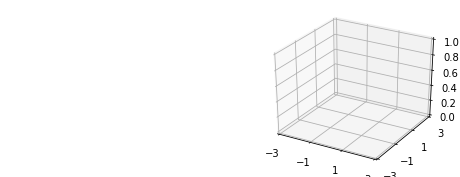

In [13]:
# load dataset
X,y = load_data('bacteria_data.csv') # load in data

# initialize figure, plot data, and dress up panels with axes labels etc.,
fig = plt.figure(facecolor = 'white',figsize = (8,3))
ax1 = fig.add_subplot(121)
ax1.set_xlim(min(X[:,1])-0.5, max(X[:,1])+0.5)
ax1.set_ylim(min(y)-0.1,max(y)+0.1)
ax1.axis('off')

ax2 = fig.add_subplot(122, projection='3d')
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False)
ax2.get_xaxis().set_ticks([-3,-1,1,3])
ax2.get_yaxis().set_ticks([-3,-1,1,3])
# ax2.axis('off')

### run gradient descent with first initial point
w0 = np.array([0,2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)

# plot points
plot_points(X,y,ax1)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'m')
show_paths(w_path,cost_path,ax2,'m')

### run gradient descent with first initial point
w0 = np.array([0,-2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'c')
show_paths(w_path,cost_path,ax2,'c')
plot_surface(ax2)
plt.show()

In [14]:
def xx(a,c,d=2,b=None):
    if b==None:
        return a+c+d
    else:
        return (a+c) * b + d
    
print(xx(a=3,c=5,b=9))

74
